<a href="https://colab.research.google.com/github/Adjalma/Mini-Projeto-DNC/blob/main/Mini_Projeto_Walmart_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Questão de Negócio:**

# **O Entendimento do Negócio:**

# **A Coleta de Dados:**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import pandas as pd
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib import rcParams
import mpl_toolkits
from math import exp, log, log1p
from random import random
from IPython.display import display
from IPython.display import HTML
%matplotlib inline


# **A Limpeza de Dados:**

Carregammos nosso dataset por completo com a função do Pandas e notamos que ele possuem 21.613 registros (linhas). 

In [3]:
#Visualizando o dataset para primeiras impressões:
walmart = pd.read_csv("/content/Walmart.csv")
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# Removendo as colunas "lat" e "long" do dataset 
kcs = kcs.drop(columns=["lat", "long"])
kcs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,Sammamish


# **A Exploração de Dados:**

In [ ]:
# Foram utilizados as premissas abaixo para definir as 5 merlhores casas para se investir

In [ ]:
melhores_Aguiar = kcs[(kcs["condition"]==5) & (kcs["view"]==4) & (kcs["waterfront"]>0) & (kcs["grade"] >=9) & (kcs["yr_built"] >0)]

melhores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
6508,4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,3510,15810,Seattle
11257,3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,5,10,3850,1000,1989,0,98034,3350,12210,Kirkland
14619,7936500109,20140725T000000,2230000.0,3,3.00,3620,28064,2.0,1,4,5,10,2370,1250,1977,0,98136,2550,34713,Seattle
14682,7278100515,20140821T000000,1295000.0,2,2.50,2910,19449,2.0,1,4,5,9,1940,970,1985,0,98177,2540,23598,Seattle
19600,284000025,20150420T000000,1410000.0,2,2.00,2180,18525,1.0,1,4,5,9,1580,600,1952,0,98146,2480,21503,Seattle


In [ ]:
# Foram utilizados as premissas abaixo para definir as 5 piores casas para se investir

In [ ]:
piores_Aguiar = kcs[(kcs["condition"]==1) & (kcs["view"]==0) & (kcs["waterfront"]==0) & (kcs["grade"] <=5) & (kcs["yr_built"] <=1942)]

piores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
36,9435300030,20140528T000000,550000.0,4,1.0,1660,34848,1.0,0,0,1,5,930,730,1933,0,98052,2160,11467,Redmond
4651,859000110,20141002T000000,125000.0,1,1.0,500,7440,1.0,0,0,1,5,500,0,1928,0,98106,1350,7440,Seattle
13628,2023049218,20140716T000000,105500.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584,Seattle
13629,2023049218,20150316T000000,445000.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584,Seattle
15293,40000362,20140506T000000,78000.0,2,1.0,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,1700,10387,Seattle


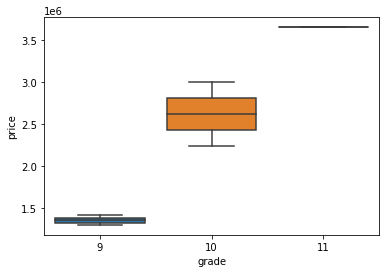

In [ ]:
sns.boxplot(data= melhores_Aguiar,x='grade', y='price');

## ***Análise final + Sugestão de imóveis ***